# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]) \
    .stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

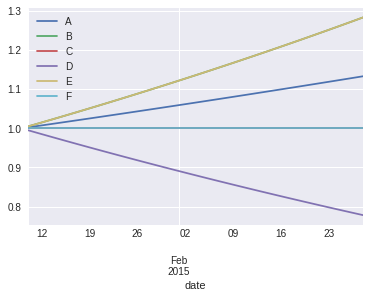

In [3]:
prices.plot()

In [4]:
prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [5]:
factor.head(10)

date         
2015-01-15  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-16  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-17  A    3.0
            B    4.0
dtype: float64

In [6]:
factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 3), 
    filter_zscore=None)



Dropped 0.0% entries from factor data (0.0% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [7]:
factor_data.head(10)

1         3  factor   group  factor_quantile
date       asset                                                   
2015-01-15 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4
           C      0.0000  0.000000     2.0  Group1                2
           D     -0.0050 -0.014925     1.0  Group2                1
2015-01-16 A      0.0025  0.007519     3.0  Group1                3
           D     -0.0050 -0.014925     1.0  Group2                1
           E      0.0050  0.015075     4.0  Group1                4
           F      0.0000  0.000000     2.0  Group2                2
2015-01-17 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1,3
Ann. alpha,0.762,0.766
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),50.000,50.000
Mean Period Wise Return Bottom Quantile (bps),-50.000,-50.000
Mean Period Wise Spread (bps),100.000,100.000


Information Analysis


,1,3
IC Mean,1.000000,1.000000
IC Std.,0.000000,0.000000
Risk-Adjusted IC,inf,inf
t-stat(IC),inf,inf
p-value(IC),0.000000,0.000000
IC Skew,0.000000,0.000000
IC Kurtosis,-3.000000,-3.000000


Turnover Analysis


,1,3
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1,3
Mean Factor Rank Autocorrelation,1.0,1.0


/home/lucasca/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


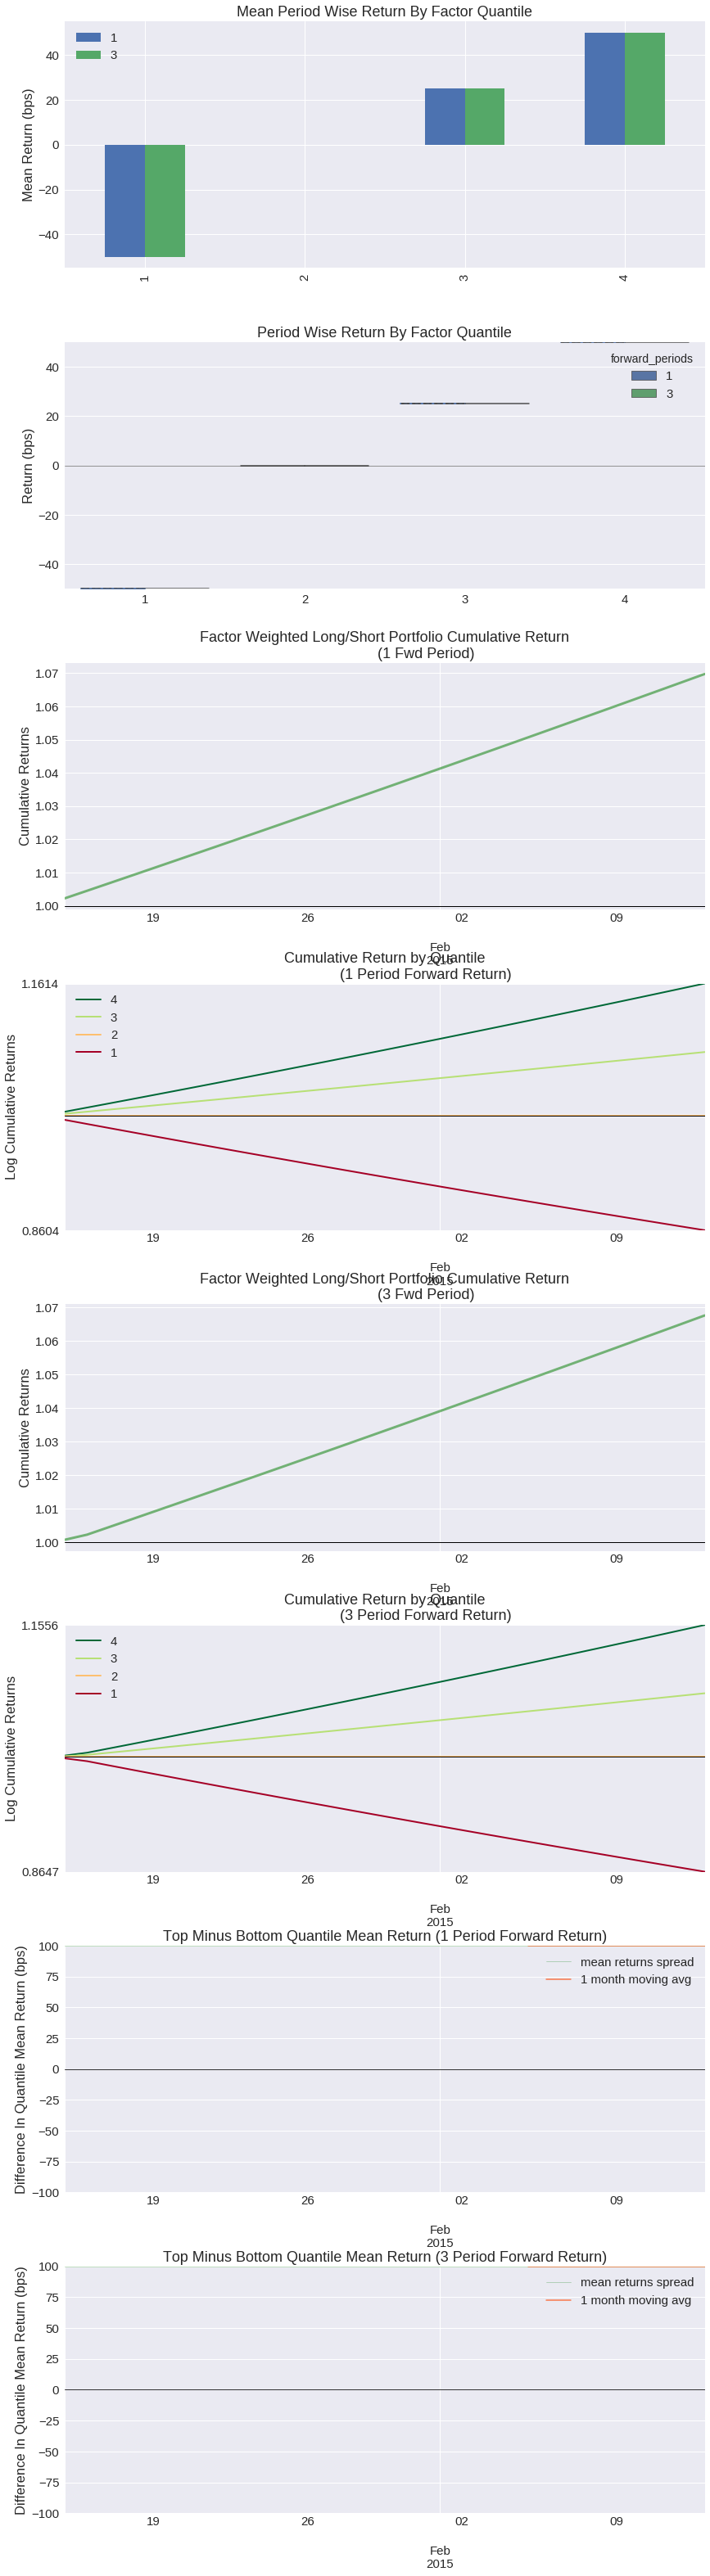

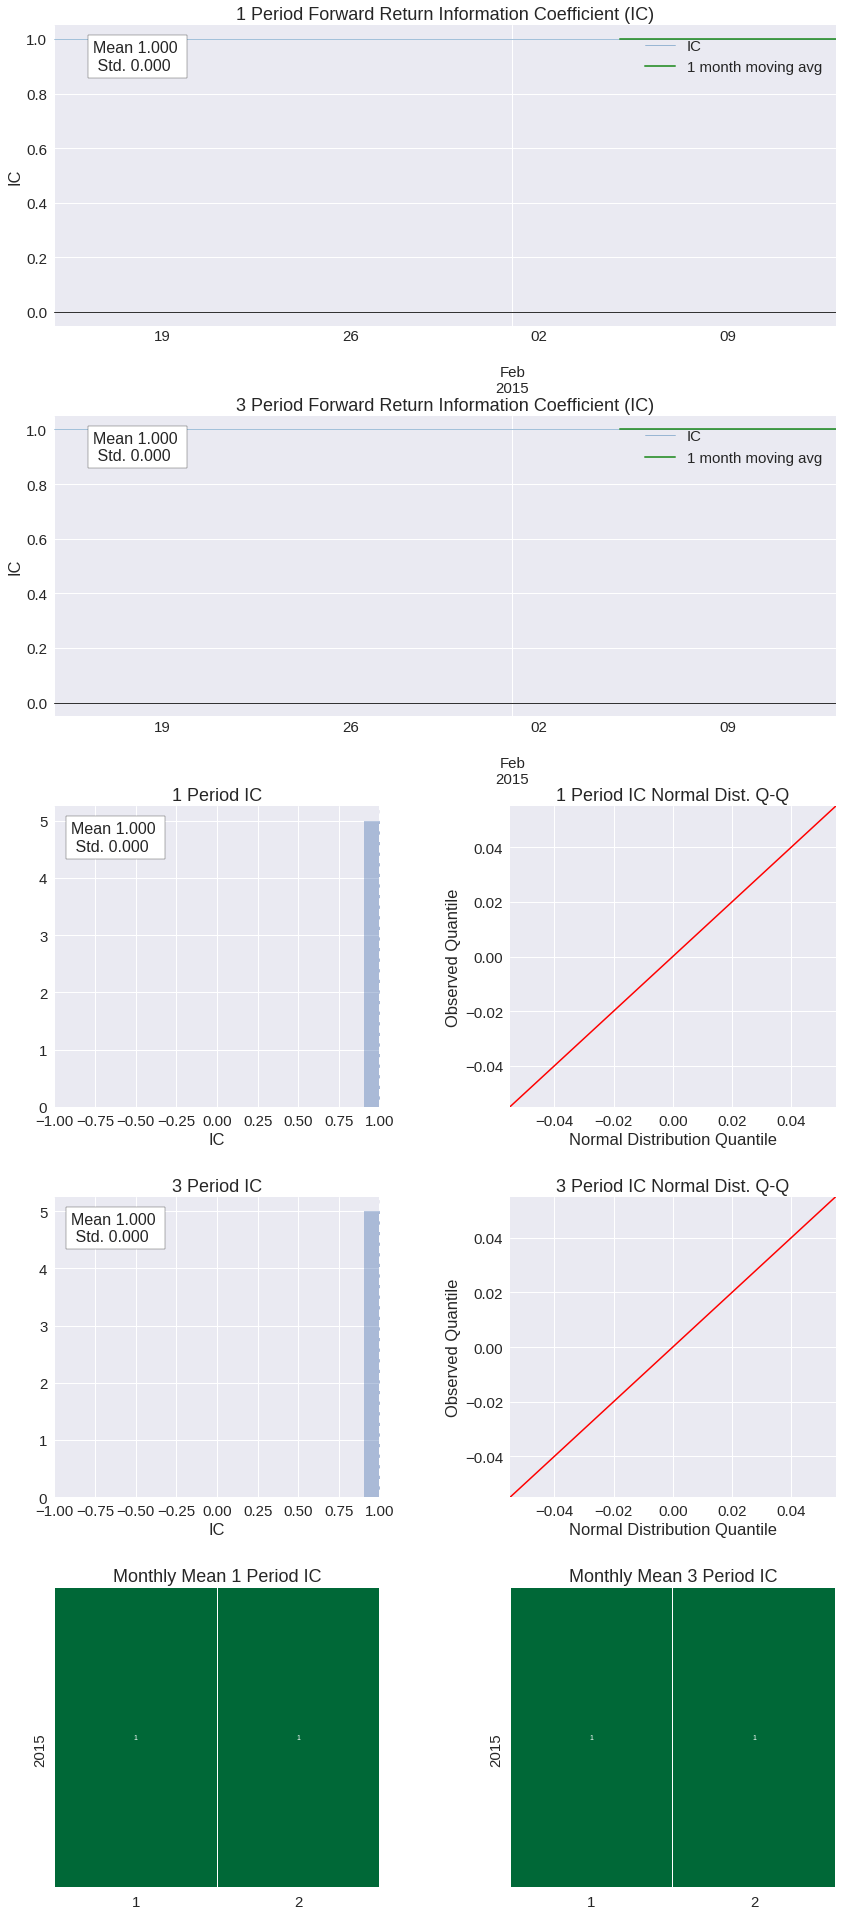

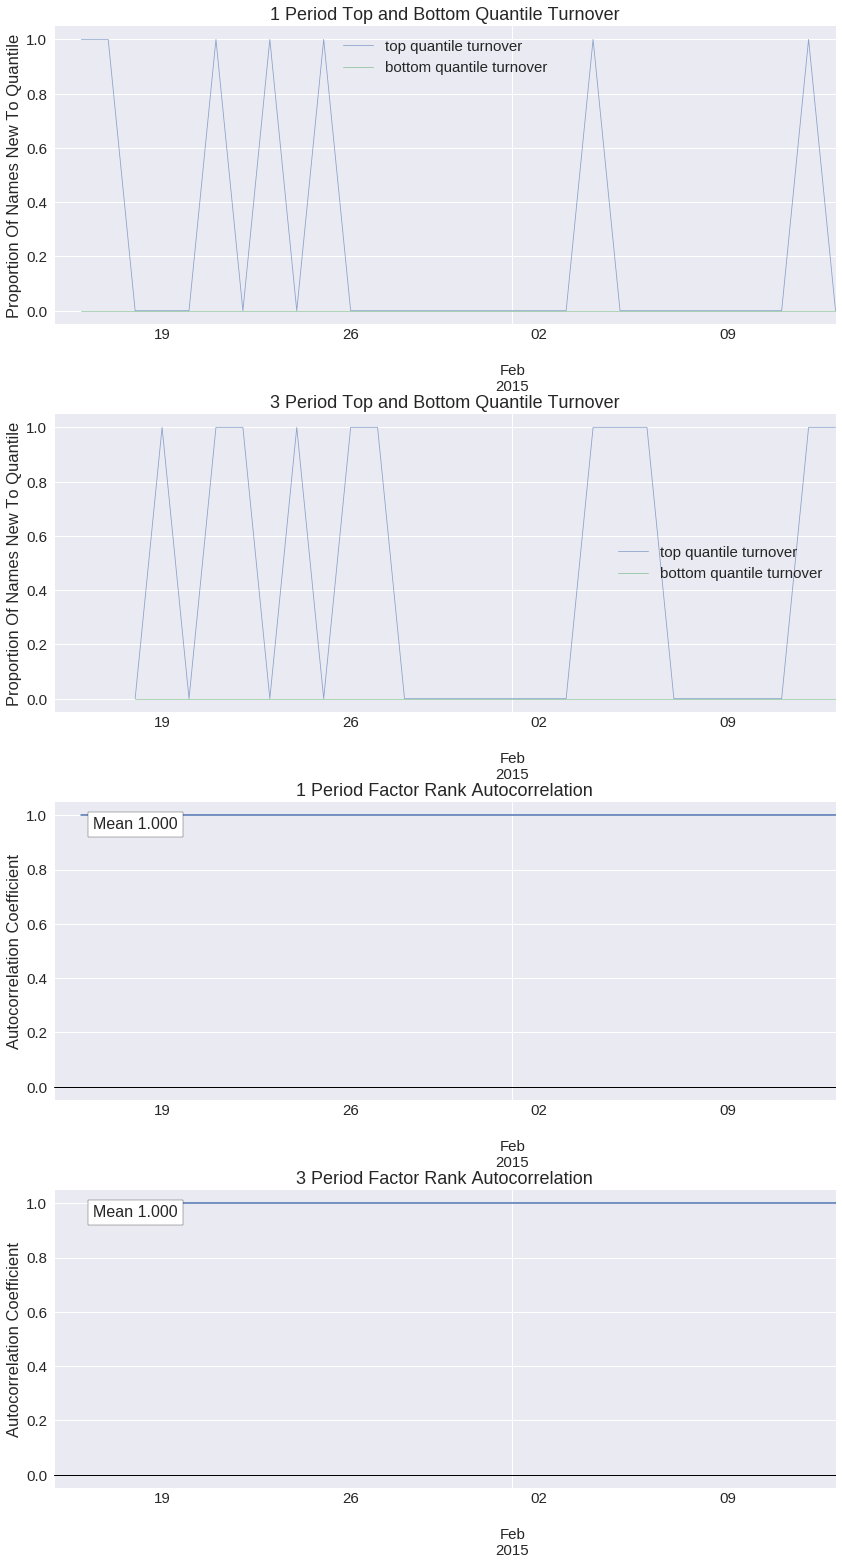

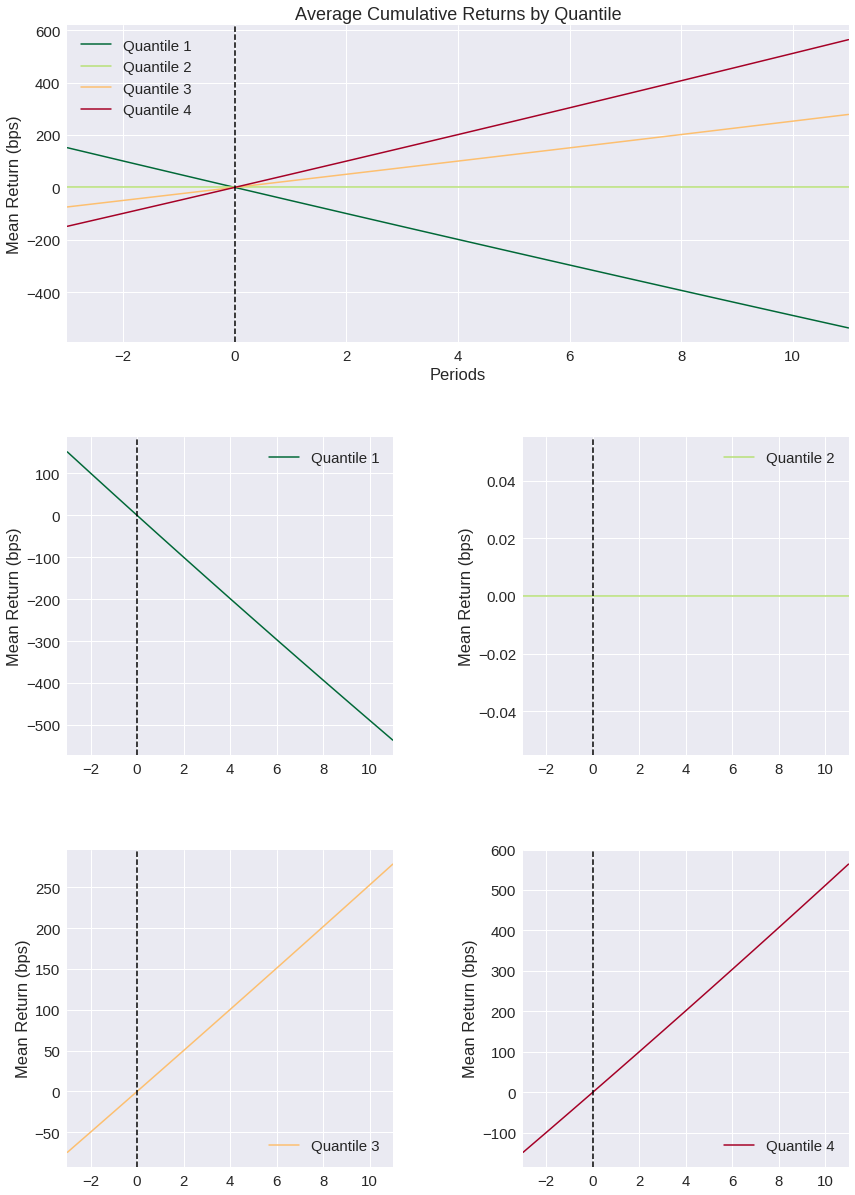

In [8]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)
plt.show()

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1,3
Ann. alpha,1.778,1.767
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),43.750,43.669
Mean Period Wise Return Bottom Quantile (bps),-56.250,-56.459
Mean Period Wise Spread (bps),100.000,100.128


Information Analysis


,1,3
IC Mean,1.000000,1.000000
IC Std.,0.000000,0.000000
Risk-Adjusted IC,inf,inf
t-stat(IC),inf,inf
p-value(IC),0.000000,0.000000
IC Skew,0.000000,0.000000
IC Kurtosis,-3.000000,-3.000000


Turnover Analysis


,1,3
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1,3
Mean Factor Rank Autocorrelation,1.0,1.0


/home/lucasca/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


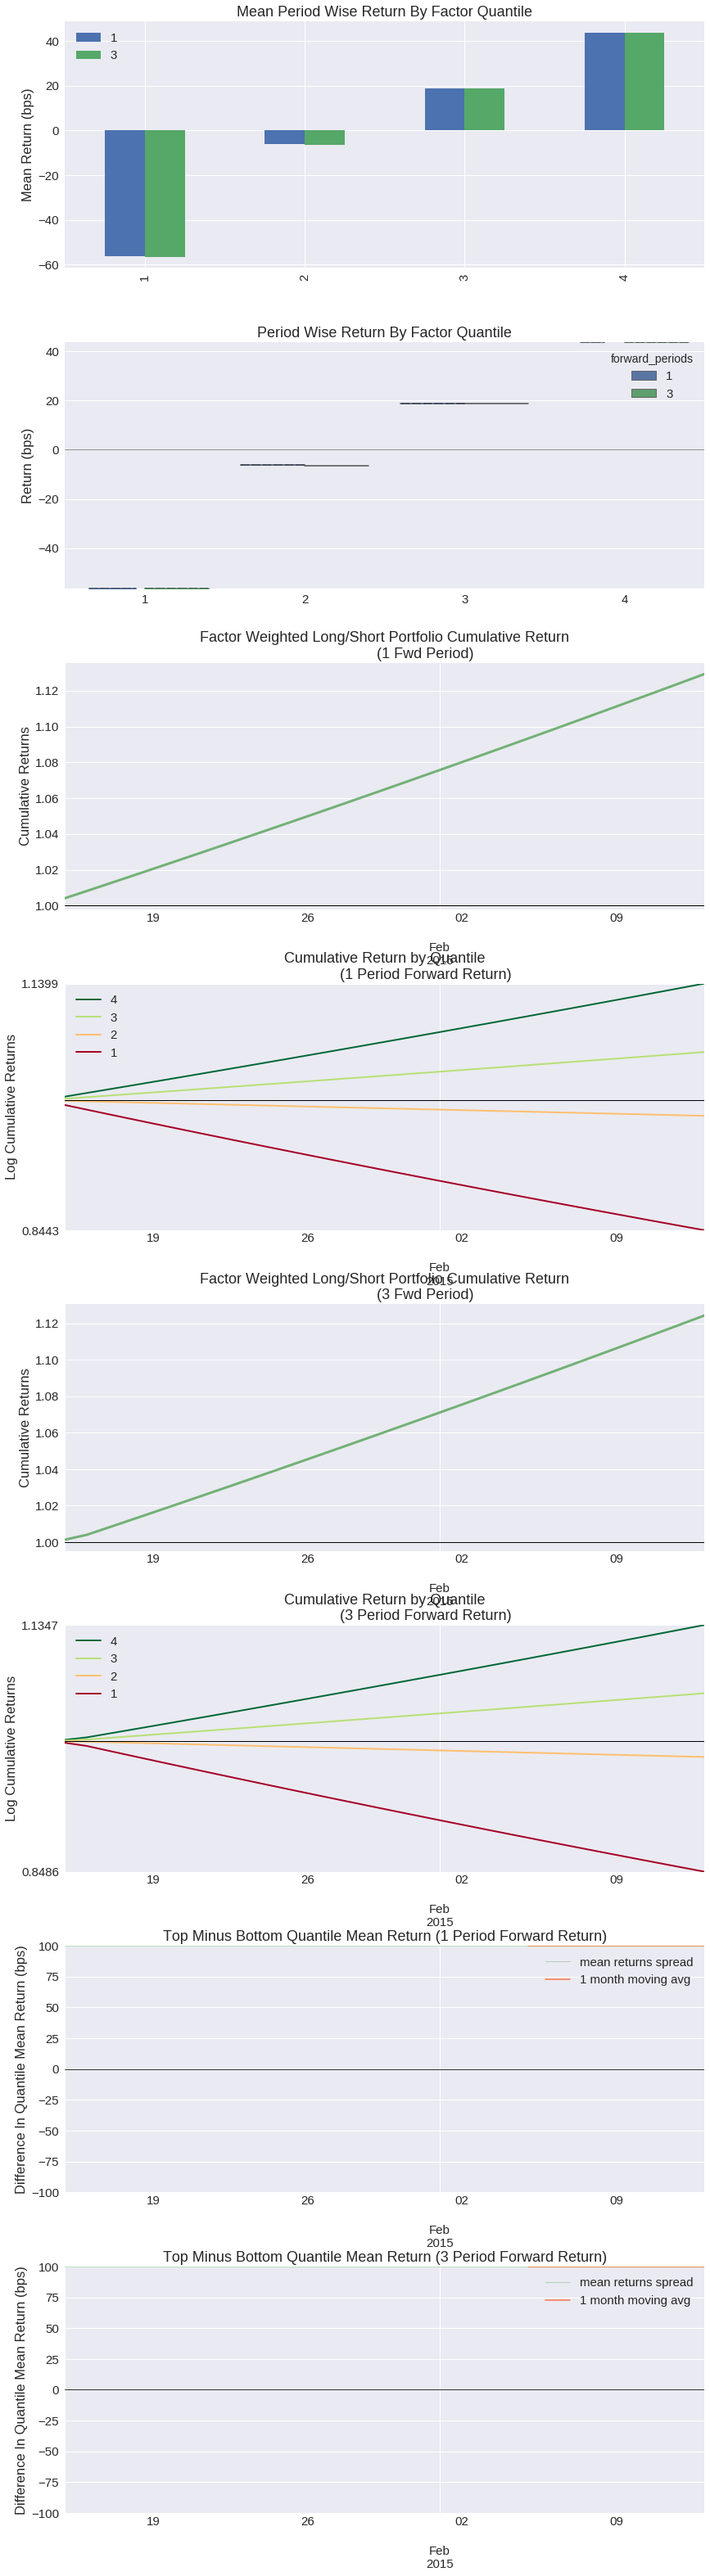

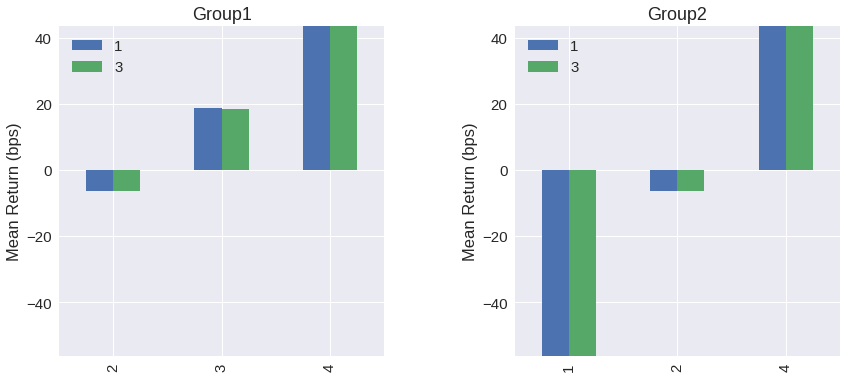

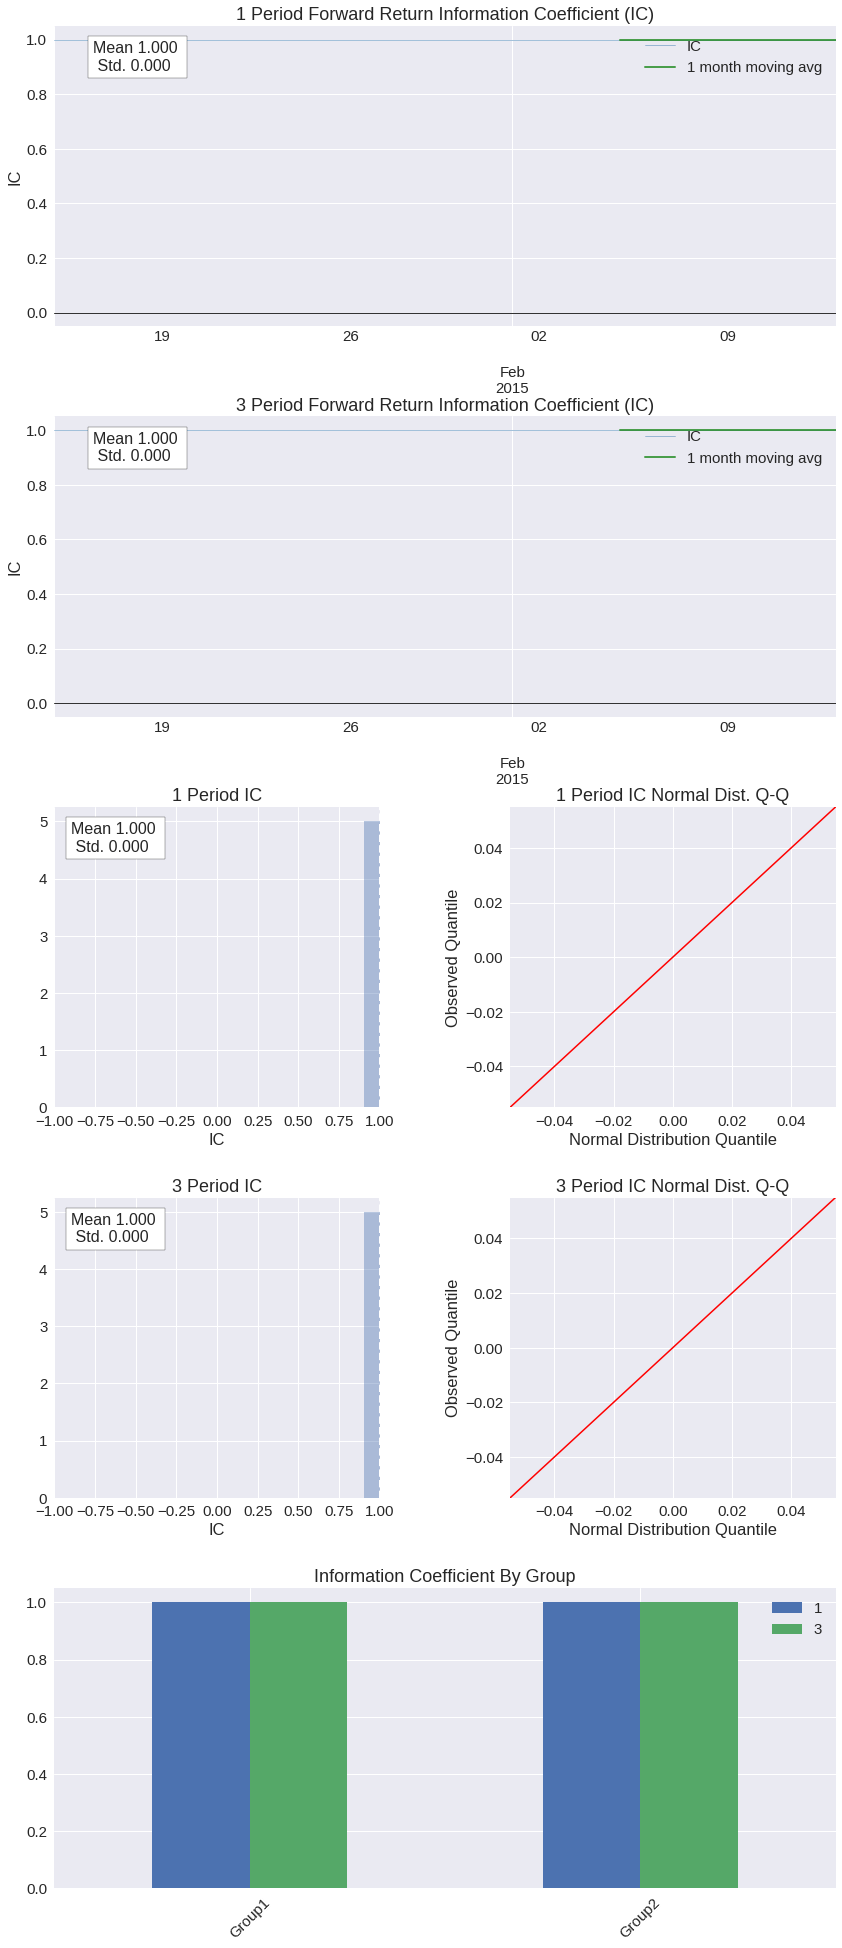

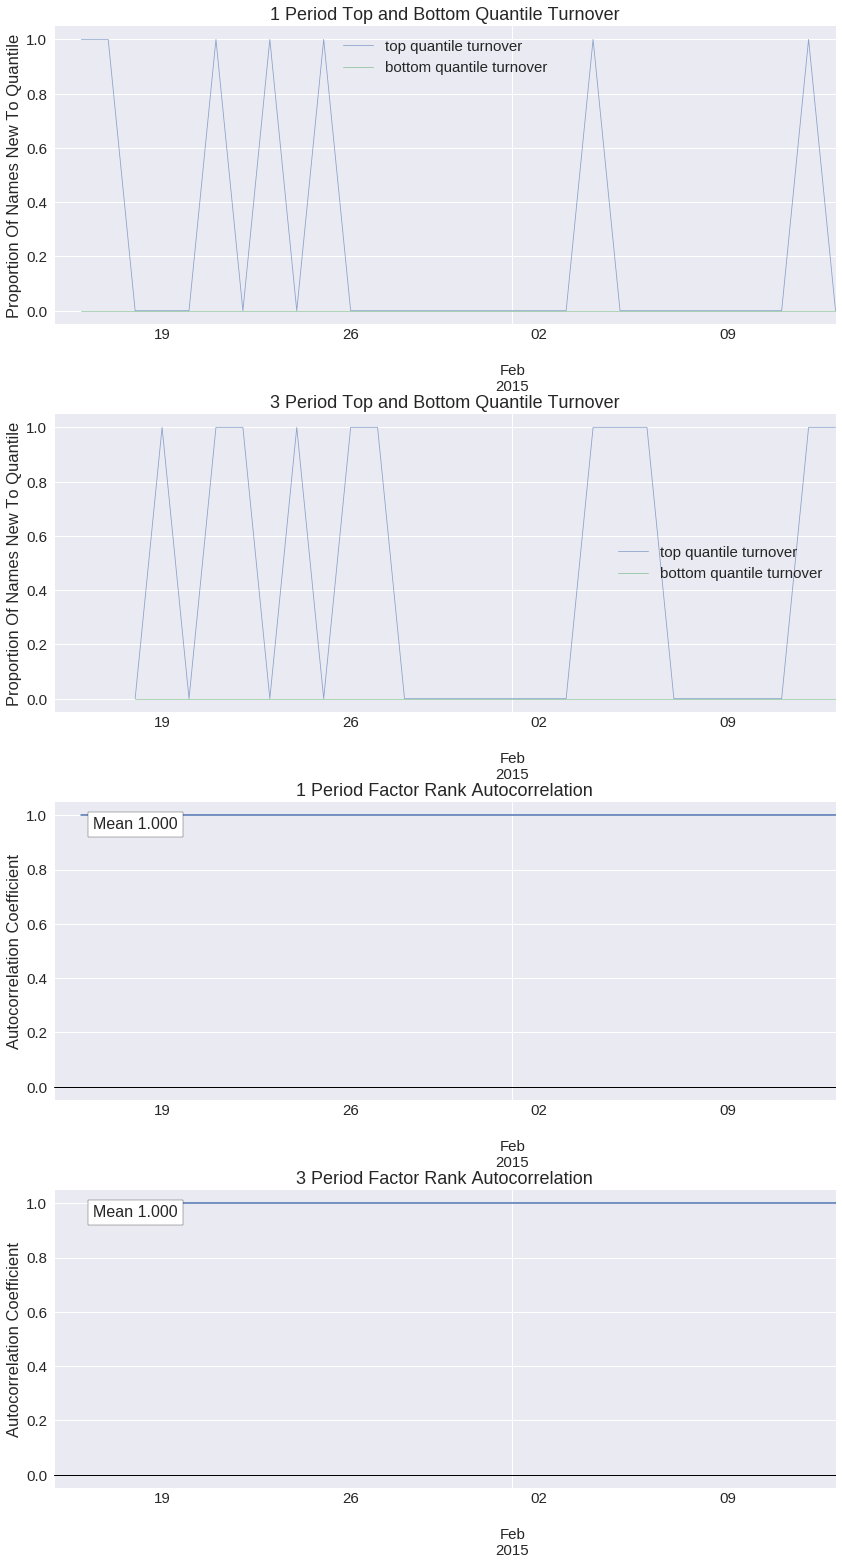

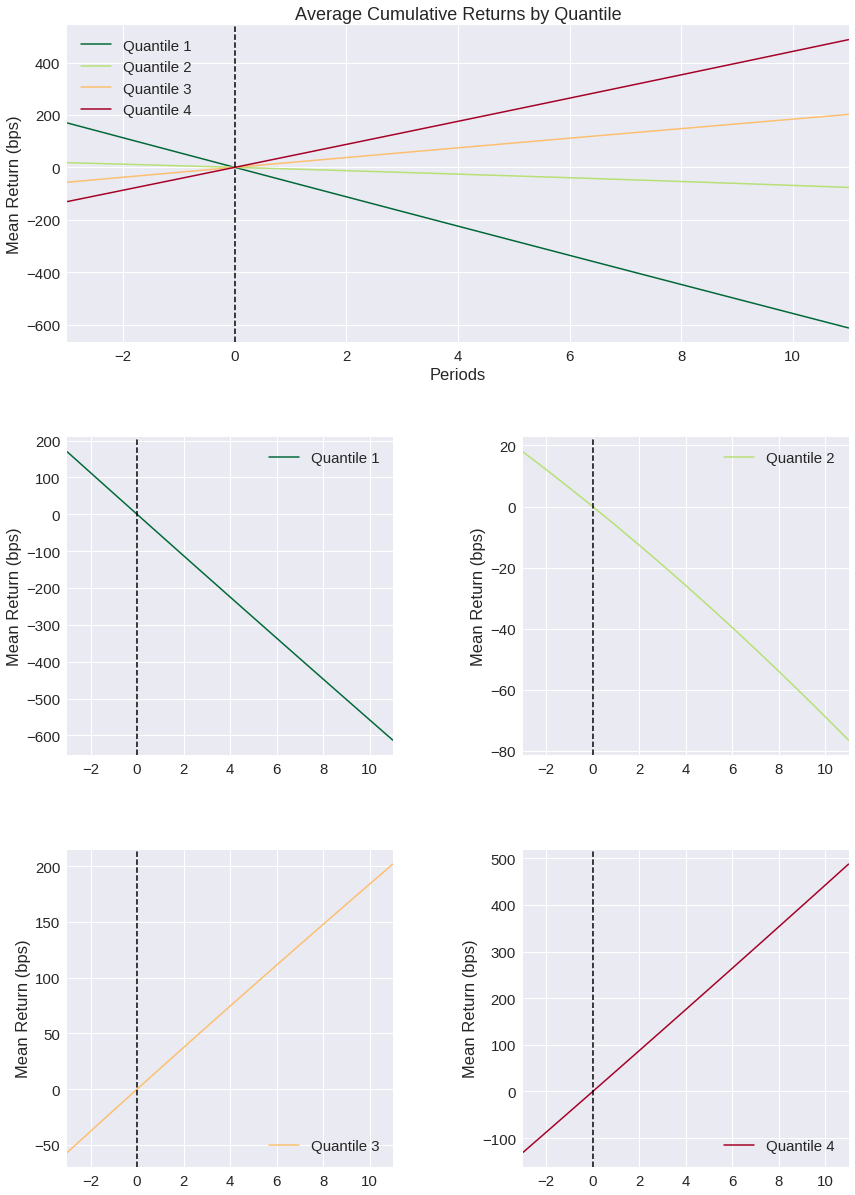

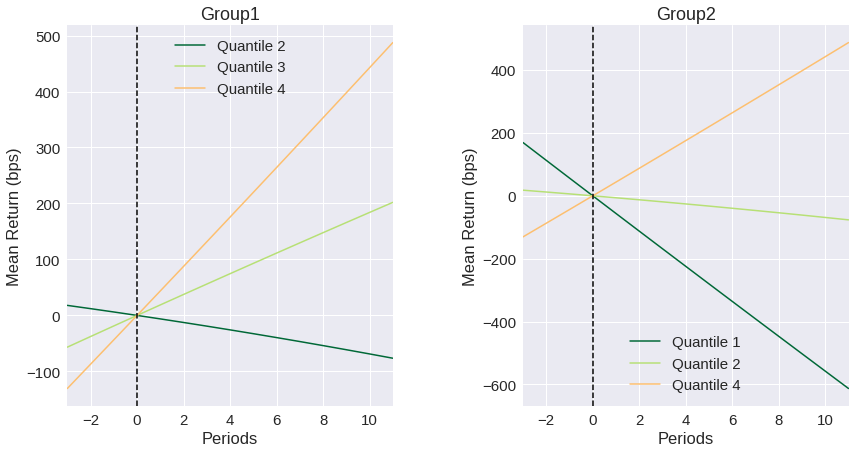

In [9]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)
plt.show()

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1,3
Ann. alpha,0.876,0.873
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),31.250,31.200
Mean Period Wise Return Bottom Quantile (bps),-37.500,-37.579
Mean Period Wise Spread (bps),68.750,68.760


Information Analysis


,1,3
IC Mean,0.700,0.700
IC Std.,0.305,0.305
Risk-Adjusted IC,2.294,2.294
t-stat(IC),12.565,12.565
p-value(IC),0.000,0.000
IC Skew,0.000,0.000
IC Kurtosis,-2.000,-2.000


Turnover Analysis


,1,3
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1,3
Mean Factor Rank Autocorrelation,1.0,1.0


/home/lucasca/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


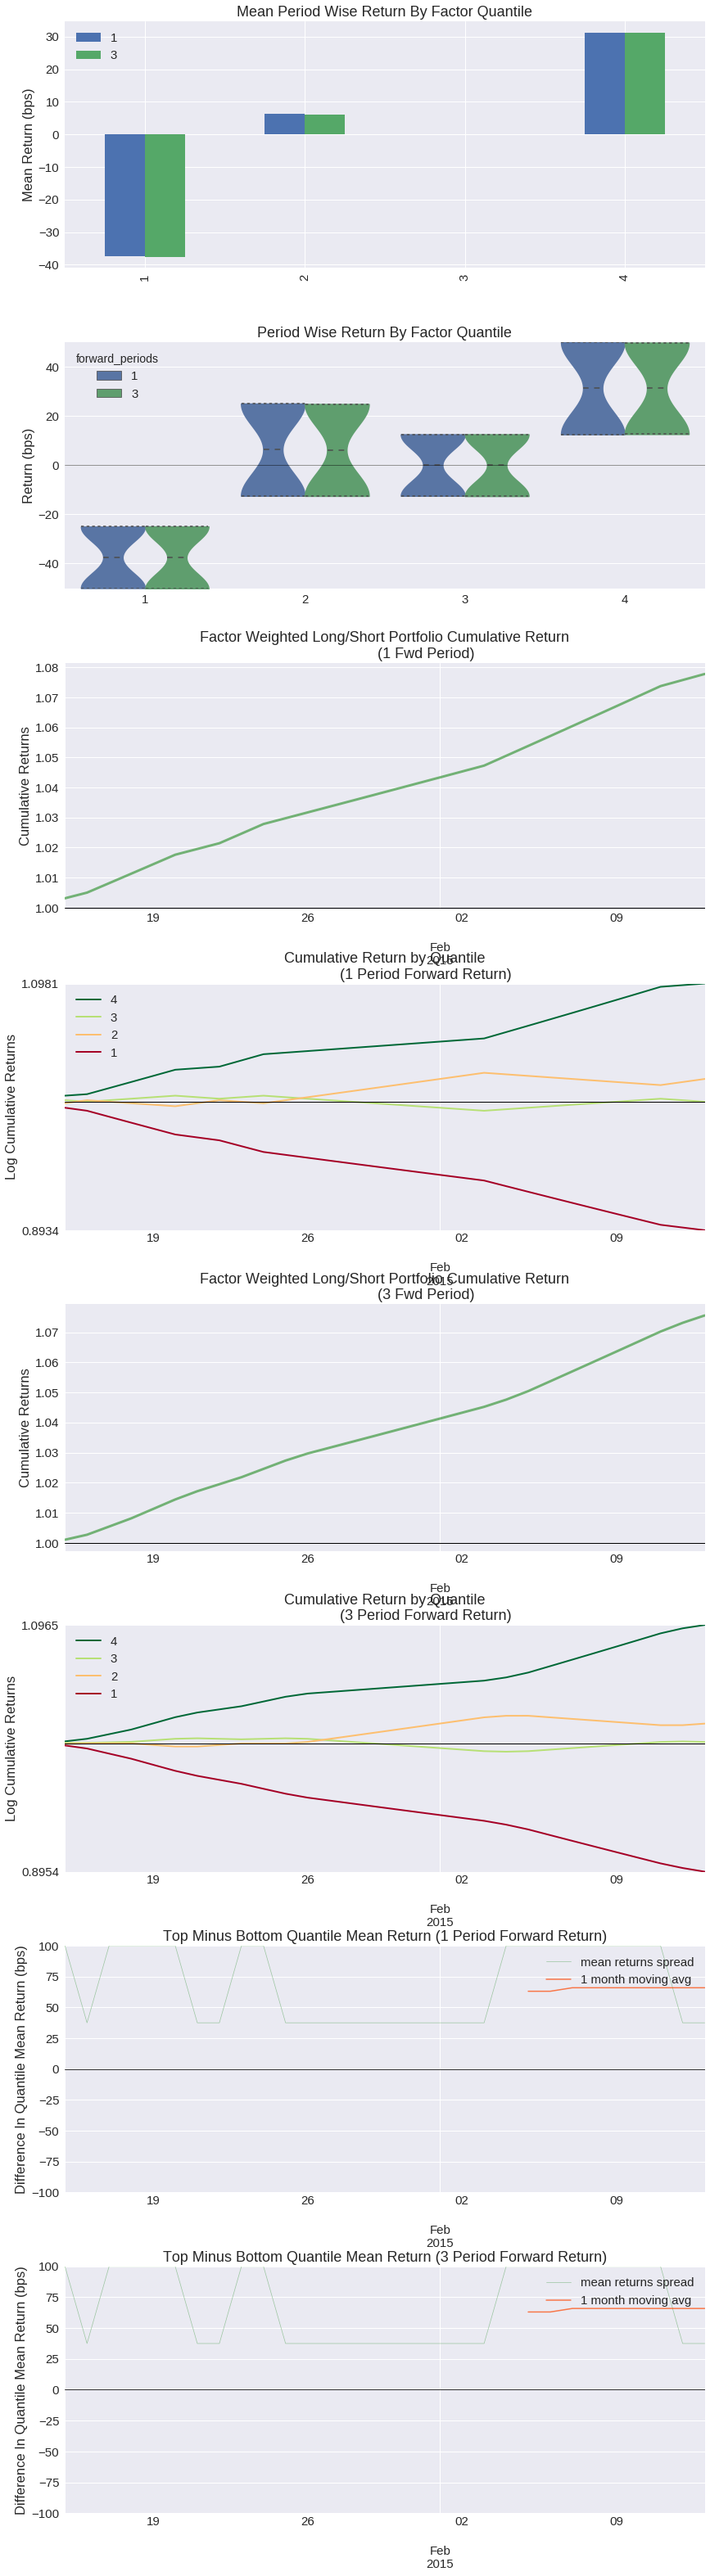

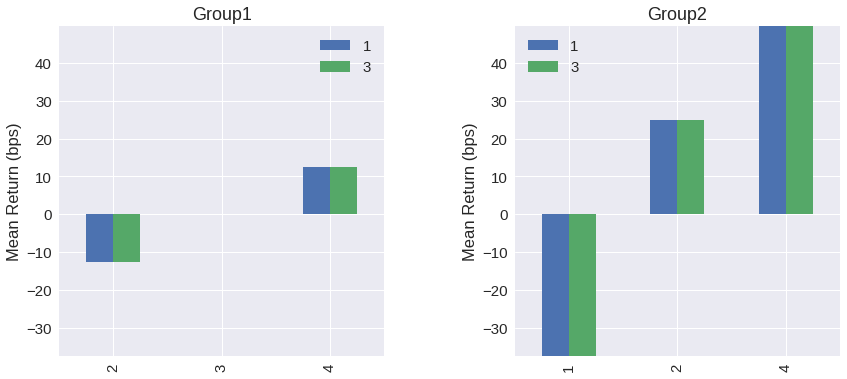

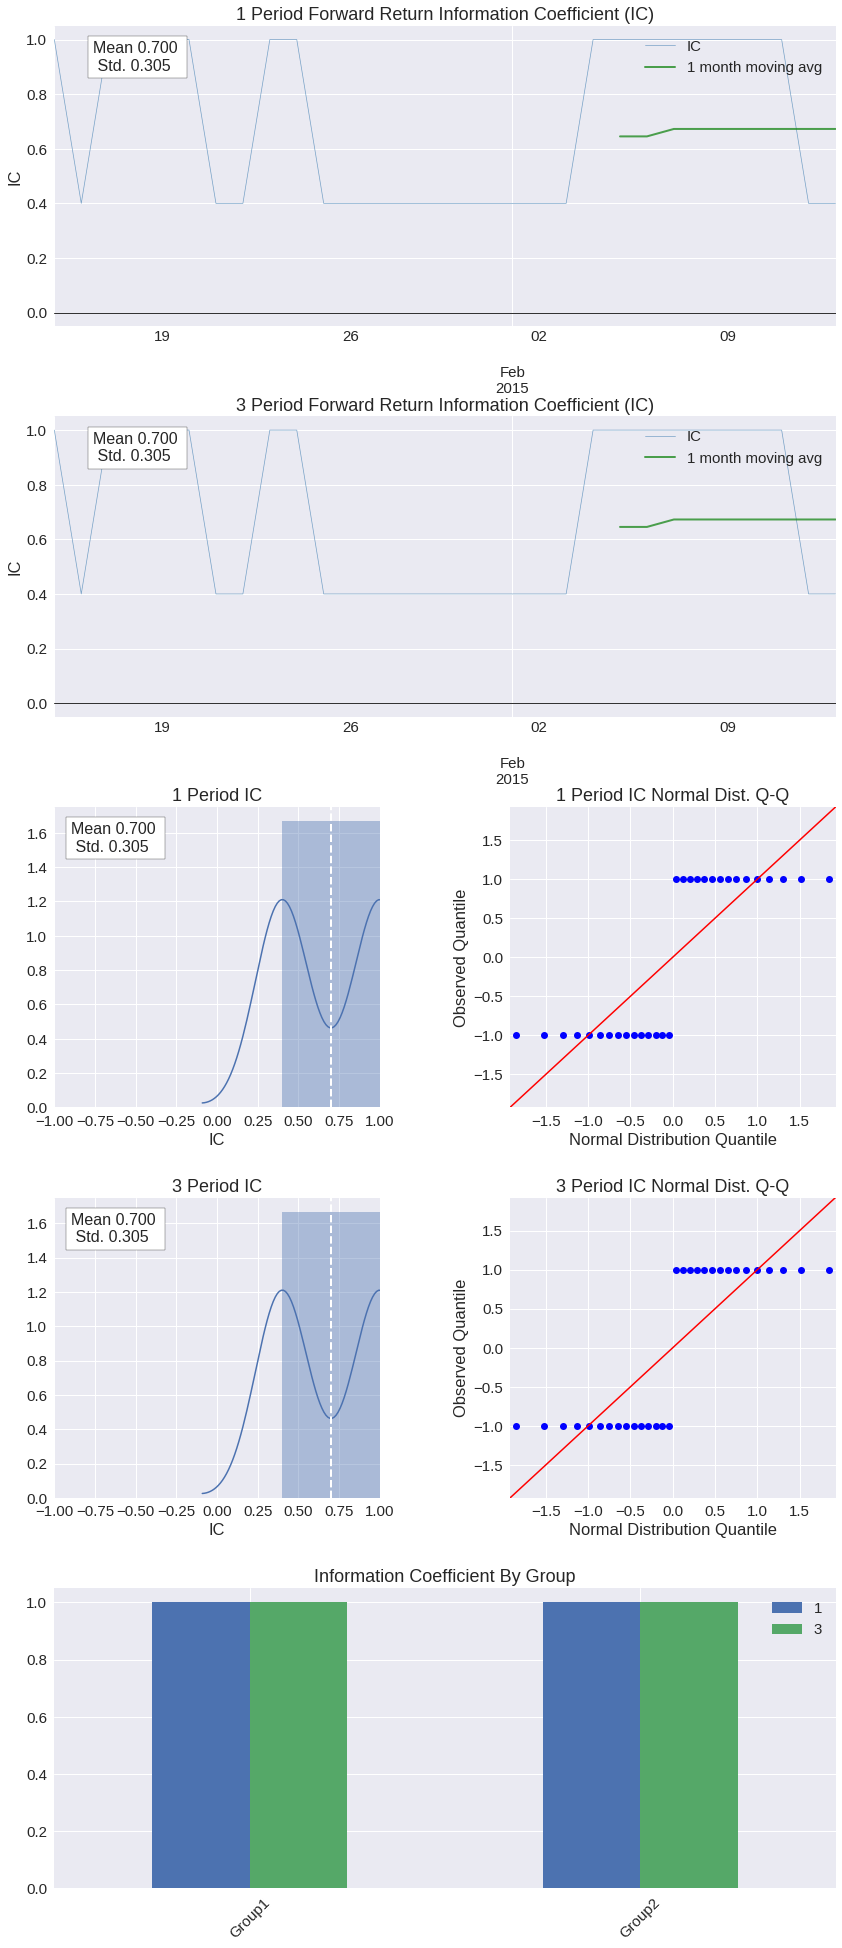

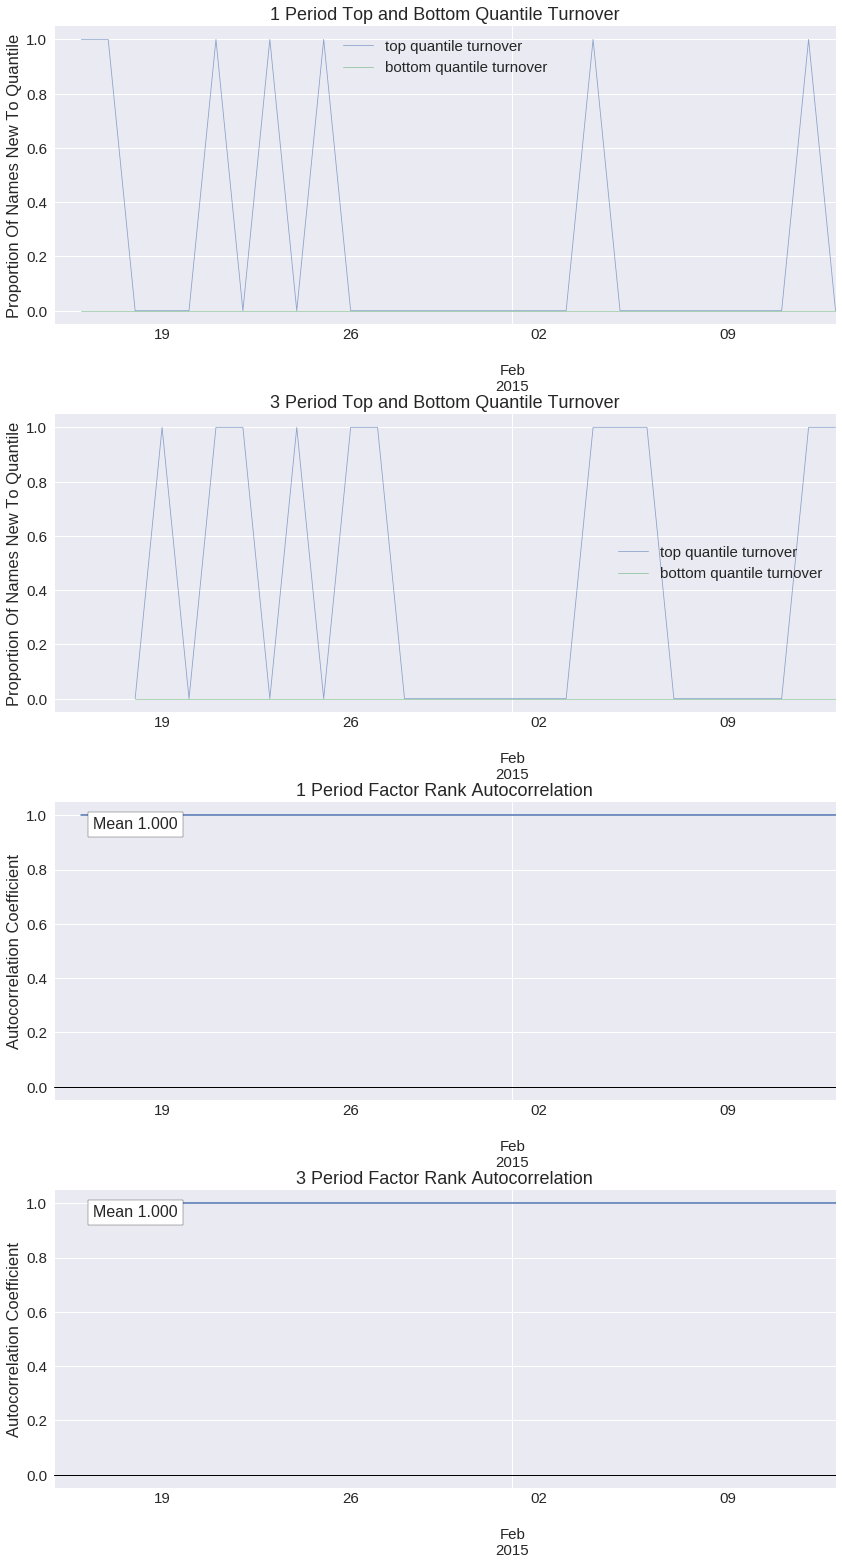

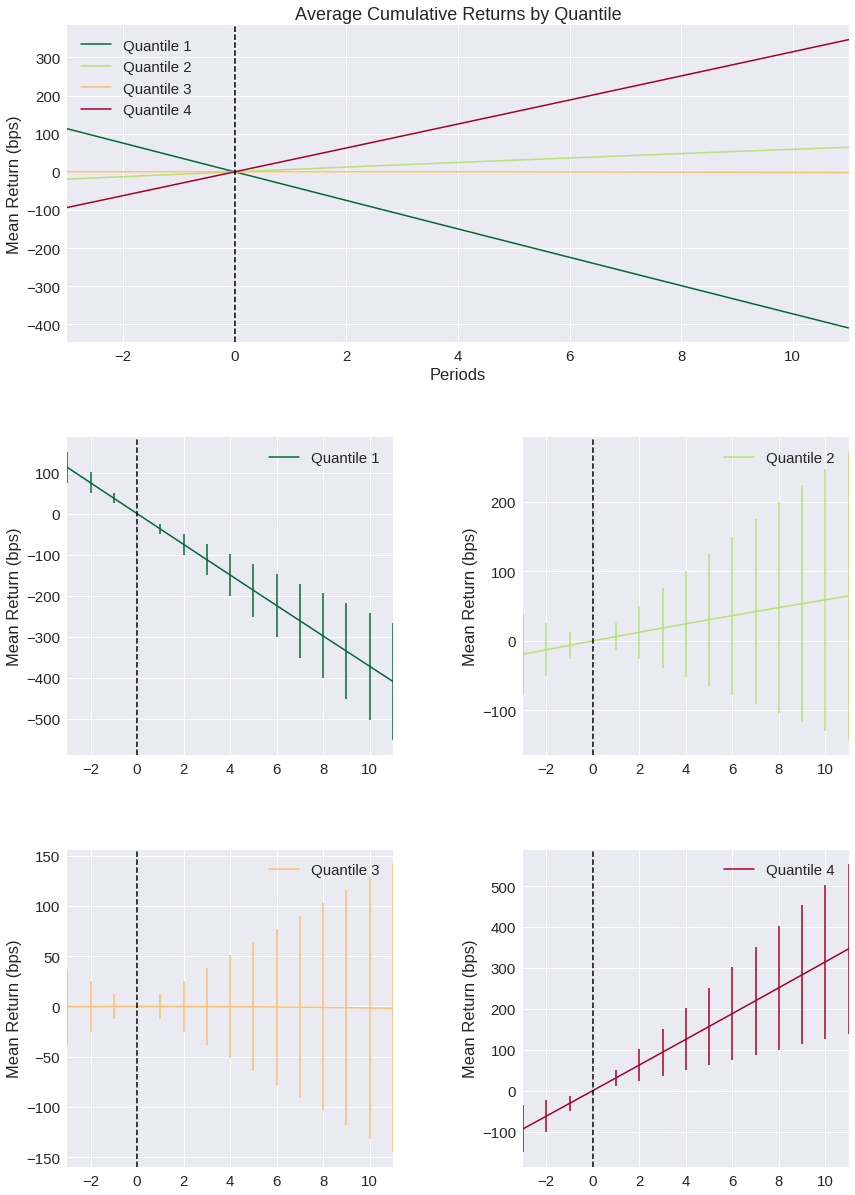

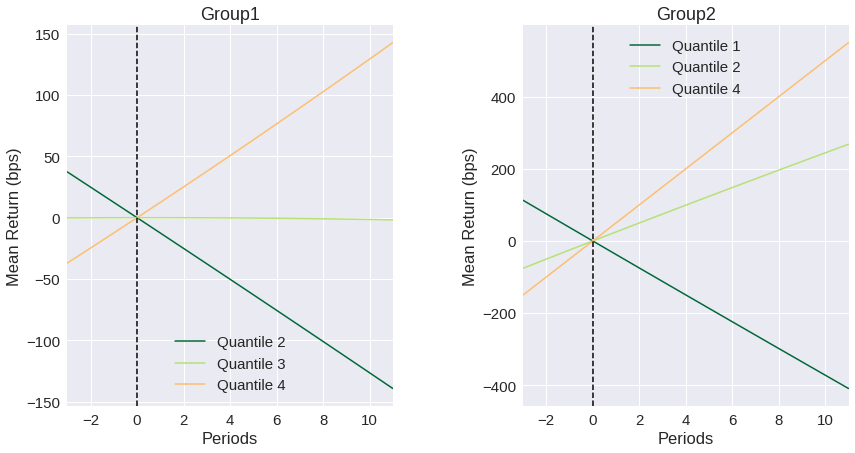

In [10]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)
plt.show()

# Event Study

In [15]:
event = DataFrame(index=factor_index, columns=tickers,
                   data=[[1, nan, nan, nan, nan, nan],
                         [4, nan, nan, 7, nan, nan],
                         [nan, nan, nan, nan, nan, nan],
                         [nan, 3, nan, 2, nan, nan],
                         [1, nan, nan, nan, nan, nan],
                         [nan, nan, 2, nan, nan, nan],
                         [nan, nan, nan, 2, nan, nan],
                         [nan, nan, nan, 1, nan, nan],
                         [2, nan, nan, nan, nan, nan],
                         [nan, nan, nan, nan, 5, nan],
                         [nan, nan, nan, 2, nan, nan],
                         [nan, nan, nan, nan, nan, nan],
                         [2, nan, nan, nan, nan, nan],
                         [nan, nan, nan, nan, nan, 5],
                         [nan, nan, nan, 1, nan, nan],
                         [nan, nan, nan, nan, 4, nan],
                         [5, nan, nan, 4, nan, nan],
                         [nan, nan, nan, 3, nan, nan],
                         [nan, nan, nan, 4, nan, nan],
                         [nan, nan, 2, nan, nan, nan],
                         [5, nan, nan, nan, nan, nan],
                         [nan, 1, nan, nan, nan, nan],
                         [nan, nan, nan, nan, 4, nan],
                         [0, nan, nan, nan, nan, nan],
                         [nan, 5, nan, nan, nan, 4],
                         [nan, nan, nan, nan, nan, nan],
                         [nan, nan, 5, nan, nan, 3],
                         [nan, nan, 1, 2, 3, nan],
                         [nan, nan, nan, 5, nan, nan],
                         [nan, nan, 1, nan, 3, nan]]).stack()

In [19]:
event.head(10)

date         
2015-01-15  A    1.0
2015-01-16  A    4.0
            D    7.0
2015-01-18  B    3.0
            D    2.0
2015-01-19  A    1.0
2015-01-20  C    2.0
2015-01-21  D    2.0
2015-01-22  D    1.0
2015-01-23  A    2.0
dtype: float64

In [16]:
event_data = get_clean_factor_and_forward_returns(event, prices,
                                                  quantiles=None, bins=1,
                                                  periods=(1, 2, 3, 4, 5, 10, 15), filter_zscore=None)

Dropped 2.9% entries from factor data (0.0% after in forward returns computation and 2.9% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [20]:
event_data.head(10)

1         2         3         4         5        10  \
date       asset                                                             
2015-01-15 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   
2015-01-16 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   
           D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-18 B      0.0050  0.010025  0.015075  0.020151  0.025251  0.051140   
           D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-19 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   
2015-01-20 C      0.0000  0.000000  0.000000  0.000000  0.000000  0.000000   
2015-01-21 D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-22 D     -0.0050 -0.009975 -0.014925 -0.019850 -0.024751 -0.048890   
2015-01-23 A      0.0025  0.005006  0.007519  0.010038  0.012563  0.025283   

                        15  factor  factor_quantile  
date       asset                                     
2015-01-15 A      0.038163     1.0              1.0  
2015-01-16 A      0.038163     4.0              1.0  
           D     -0.072431     7.0              1.0  
2015-01-18 B      0.077683     3.0              1.0  
           D     -0.072431     2.0              1.0  
2015-01-19 A      0.038163     1.0              1.0  
2015-01-20 C      0.000000     2.0              1.0  
2015-01-21 D     -0.072431     2.0              1.0  
2015-01-22 D     -0.072431     1.0              1.0  
2015-01-23 A      0.038163     2.0              1.0

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,1.0,7.0,3.058824,1.613225,34,100.0


/home/lucasca/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


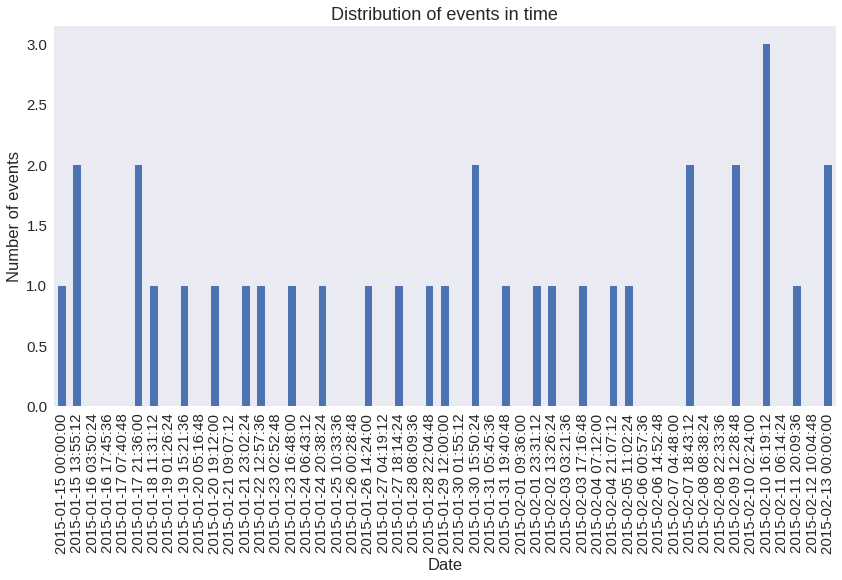

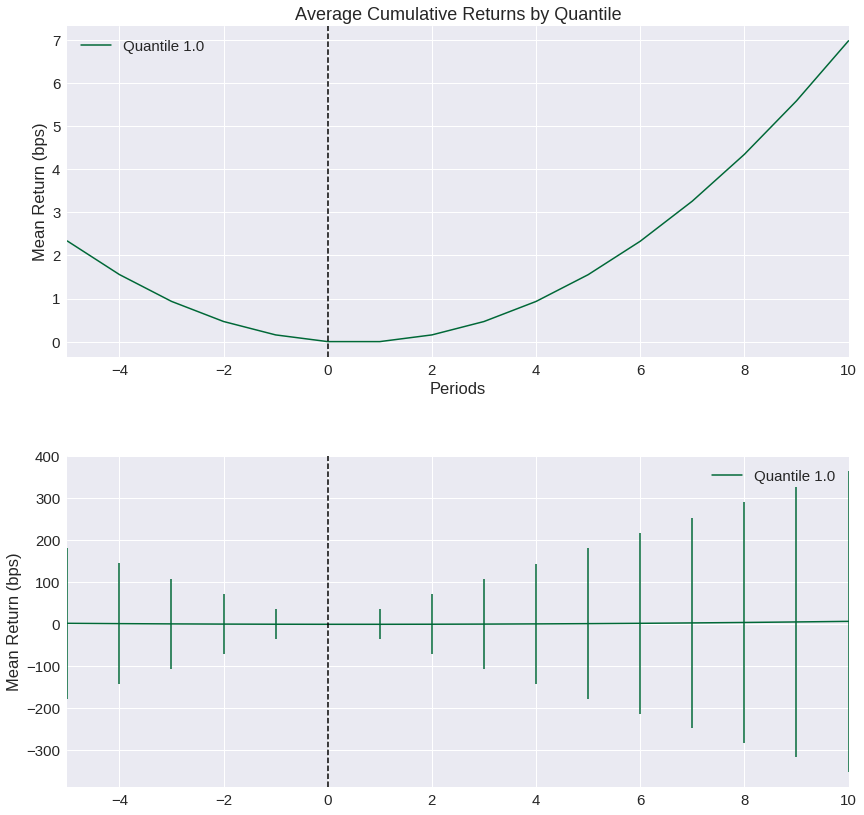

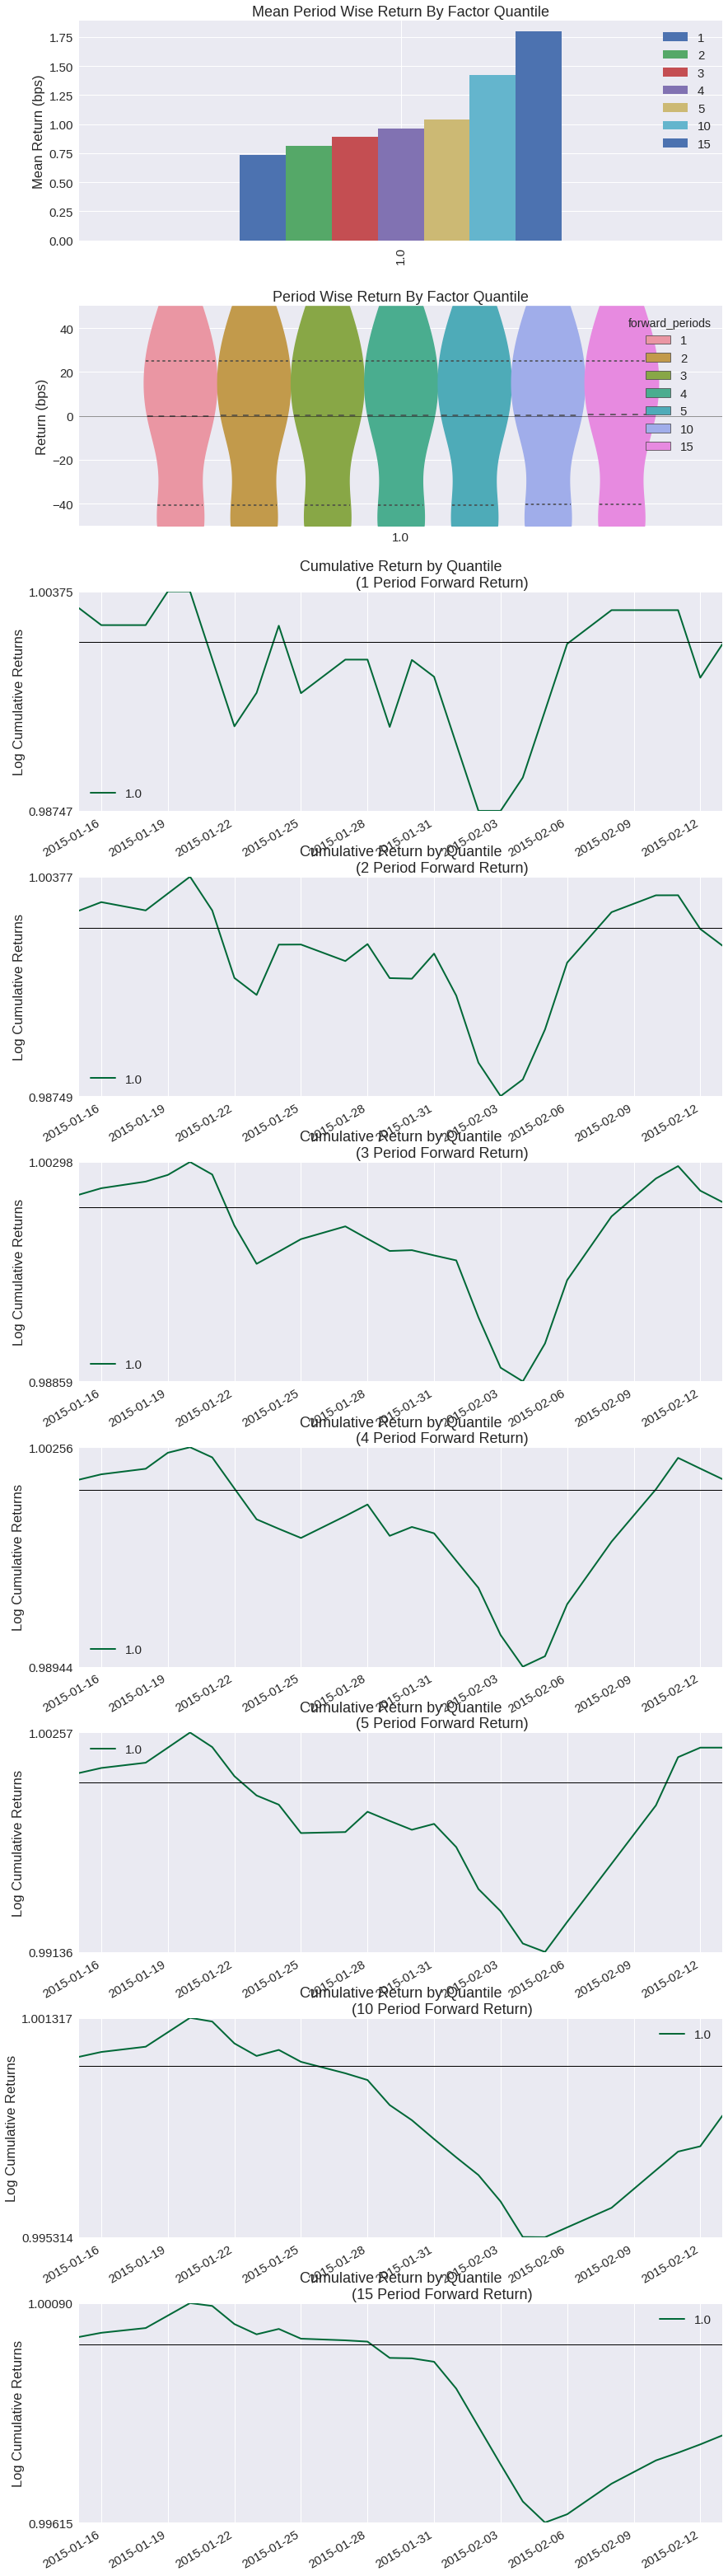

In [17]:
create_event_study_tear_sheet(event_data, prices, avgretplot=(5, 10))
plt.show()